In [1]:
import os
import sys
import numpy as np
# import numpy.ma as ma
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pd
# import cmocean
import xarray as xr
import seaborn as sns

import rasterio
def print_raster(raster):
    print(
        f"shape: {raster.shape}\n"
#         f"resolution: {raster.resolution()}\n"
        f"bounds: {raster.bounds}\n"
#         f"sum: {raster.sum().item()}\n"
        f"CRS: {raster.crs}\n"
    )

/Users/dporter/opt/anaconda3/envs/bedclass/lib/python3.9/site-packages/xarray/backends/cfgrib_.py:27: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(


In [2]:
# Determine where to look #
basedir = '/Users/dporter/data/'
# basedir = 'data'
# basedir = '/Users/dporter/Documents/Research/Projects/bedclass/data'

datadir = 'Antarctic/ROSETTA/for_COMBINED/'

In [3]:
suffix = '.csv'
datafile = 'rosetta_combined'

infile = os.path.join(basedir, datadir, datafile + suffix)
print(infile)

/Users/dporter/data/Antarctic/ROSETTA/for_COMBINED/rosetta_combined.csv


In [4]:
df = pd.read_csv(infile)
df

,Line,X_EPSG_3031,Y_EPSG_3031,unixtime,thickness_dice,rosetta_lidar,rosetta_lidar_wrtgeo,rosetta_lidar_thickness,diff_diceltthick_rsaltthick,dice_thick_bedmapthick
0,L20,-178255.739629,-460417.119902,1.480723e+09,NaN,166.500472,203.484556,1851.169232,NaN,NaN
1,L20,-178346.076341,-460417.397744,1.480723e+09,NaN,166.328215,203.316570,1849.641012,NaN,NaN
2,L20,-178436.480663,-460417.972846,1.480723e+09,NaN,166.155938,203.148576,1848.112705,NaN,NaN
3,L20,-178526.896118,-460418.579014,1.480723e+09,NaN,165.983822,202.980743,1846.585878,NaN,NaN
4,L20,-178617.232081,-460419.255438,1.480723e+09,NaN,165.812069,202.813272,1845.062336,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
646972,T1140,331761.487504,-962391.639624,1.448396e+09,NaN,114.846254,162.627720,1479.480494,NaN,NaN
646973,T1140,331761.575345,-962295.965842,1.448396e+09,NaN,121.094440,168.872927,1536.295304,NaN,NaN
646974,T1140,331761.616047,-962200.289242,1.448396e+09,NaN,127.342182,175.117692,1593.106081,NaN,NaN
646975,T1140,331761.623322,-962104.611879,1.448396e+09,NaN,133.589404,181.361937,1649.912134,NaN,NaN


In [5]:
print(df.info())
print (df['Line'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 646977 entries, 0 to 646976
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Line                         646977 non-null  object 
 1   X_EPSG_3031                  646977 non-null  float64
 2   Y_EPSG_3031                  646977 non-null  float64
 3   unixtime                     636781 non-null  float64
 4   thickness_dice               445083 non-null  float64
 5   rosetta_lidar                593285 non-null  float64
 6   rosetta_lidar_wrtgeo         593285 non-null  float64
 7   rosetta_lidar_thickness      593285 non-null  float64
 8   diff_diceltthick_rsaltthick  407356 non-null  float64
 9   dice_thick_bedmapthick       439168 non-null  float64
dtypes: float64(9), object(1)
memory usage: 49.4+ MB
None
['L20' 'L50' 'L70' 'L80' 'L100' 'L110' 'L130' 'L140' 'L160' 'L180' 'L190'
 'L200' 'L210' 'L230' 'L250' 'L270' 'L290' 'L310'

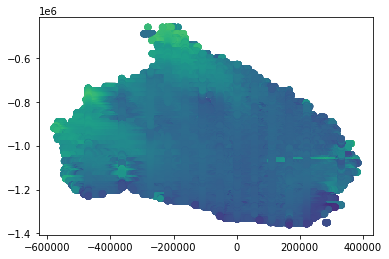

In [6]:
plt.scatter(df.X_EPSG_3031, df.Y_EPSG_3031, c=df.thickness_dice)


In [7]:
# ln20 = df.where(df.Line == 'L20')

line = df.query('Line == "L780"')
line

,Line,X_EPSG_3031,Y_EPSG_3031,unixtime,thickness_dice,rosetta_lidar,rosetta_lidar_wrtgeo,rosetta_lidar_thickness,diff_diceltthick_rsaltthick,dice_thick_bedmapthick
479160,L780,-522505.514637,-1.220915e+06,1.449052e+09,NaN,569.170911,623.730975,5674.295951,NaN,NaN
479161,L780,-522406.984790,-1.220898e+06,1.449052e+09,NaN,568.545575,623.104931,5668.600610,NaN,NaN
479162,L780,-522308.309493,-1.220880e+06,1.449052e+09,NaN,567.916847,622.475500,5662.874463,NaN,NaN
479163,L780,-522209.488288,-1.220863e+06,1.449052e+09,NaN,567.284704,621.842659,5657.117285,NaN,NaN
479164,L780,-522110.510614,-1.220845e+06,1.449052e+09,NaN,566.649147,621.206410,5651.329106,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
487526,L780,292059.452710,-1.220637e+06,1.449060e+09,NaN,-39.978336,10.544241,95.924601,NaN,NaN
487527,L780,292151.805352,-1.220639e+06,1.449060e+09,NaN,-39.827084,10.694072,97.287667,NaN,NaN
487528,L780,292244.121687,-1.220639e+06,1.449060e+09,NaN,-39.673928,10.845799,98.667977,NaN,NaN
487529,L780,292336.529675,-1.220639e+06,1.449060e+09,NaN,-39.518998,10.999291,100.064343,NaN,NaN


In [8]:
## fix PROJ path
import pyproj

projpath = sys.prefix + '/share/proj'
pyproj.datadir.set_data_dir(projpath)

/Users/dporter/opt/anaconda3/envs/bedclass/lib/python3.9/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [9]:
# from osgeo import ogr
import geopandas as gpd
# import shapefile as shp

# data/ASE_catchments_matchGL.geojson
# data/ASE_GroundingLine_simple.geojson

outlines = 'data/ASE_catchments+GL_3031.shp'

shapefile = gpd.read_file(outlines)

shapefile.head()

,groundedic,grounded_1,geometry
0,Grounded,GR,"POLYGON ((-1608074.997 -638549.999, -1608123.7..."
1,Grounded,GR,"POLYGON ((-1739481.254 -401608.850, -1740262.4..."
2,Grounded,GR,"POLYGON ((-1609325.000 -722675.000, -1609325.0..."
3,Grounded,GR,"MULTIPOLYGON (((-1604824.996 -612051.692, -160..."
4,Grounded,GR,"POLYGON ((-1908272.291 -410339.703, -1908540.1..."


In [10]:
from matplotlib.colors import ListedColormap

cmap = np.zeros([256, 4])
cmap[:, 3] = np.linspace(0, 1, 256)
cmap = ListedColormap(cmap)

(-1500000.0, -400000.0)

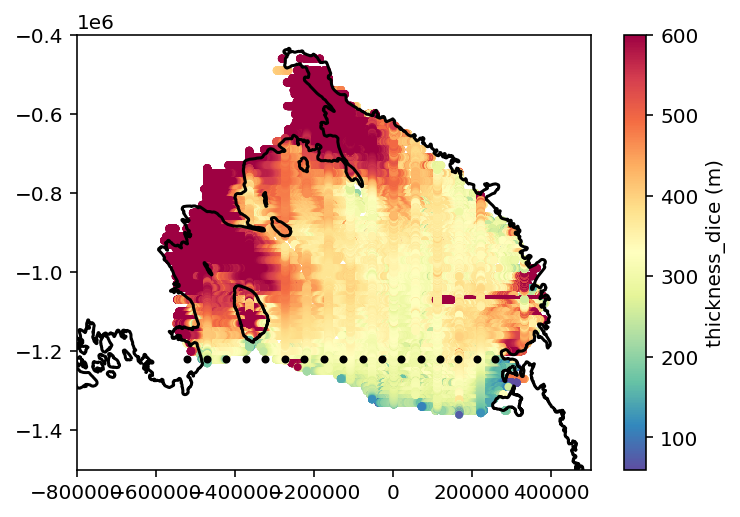

In [11]:
fig, ax = plt.subplots(dpi=144)  # figsize=(8, 8), 
ax.set_aspect('equal')

shapefile.boundary.plot(ax=ax, edgecolor='black')

plt.scatter(df.X_EPSG_3031, df.Y_EPSG_3031, c=df.thickness_dice,
            vmin=60, vmax=600,
            marker='.',
            cmap="Spectral_r")
plt.colorbar(label="thickness_dice (m)")

# plt.scatter(df_ASE.X, df_ASE.Y, c=y_pred_ASE, 
#             marker='.',
#             cmap=cmap, edgecolors=None)
plt.scatter(line.X_EPSG_3031[::500], line.Y_EPSG_3031[::500], 
            c='black',
            marker='.',
            cmap=cmap, edgecolors=None,
            )

plt.xlim(-0.8e6, 0.5e6)
plt.ylim(-1.5e6, -0.4e6)

# plt.savefig('figs/mapplot_ASE_ypred_antgg.png')


In [12]:
# ln20['datetime'] = 
line.index = pd.to_datetime(line["unixtime"], unit='s')
line.tail()

,Line,X_EPSG_3031,Y_EPSG_3031,unixtime,thickness_dice,rosetta_lidar,rosetta_lidar_wrtgeo,rosetta_lidar_thickness,diff_diceltthick_rsaltthick,dice_thick_bedmapthick
unixtime,,,,,,,,,,
2015-12-02 12:46:09,L780,292059.452710,-1.220637e+06,1.449060e+09,NaN,-39.978336,10.544241,95.924601,NaN,NaN
2015-12-02 12:46:10,L780,292151.805352,-1.220639e+06,1.449060e+09,NaN,-39.827084,10.694072,97.287667,NaN,NaN
2015-12-02 12:46:11,L780,292244.121687,-1.220639e+06,1.449060e+09,NaN,-39.673928,10.845799,98.667977,NaN,NaN
2015-12-02 12:46:12,L780,292336.529675,-1.220639e+06,1.449060e+09,NaN,-39.518998,10.999291,100.064343,NaN,NaN
2015-12-02 12:46:13,L780,292428.955095,-1.220639e+06,1.449060e+09,NaN,-39.363845,11.153004,101.462725,NaN,NaN


(-200.0, 700.0)

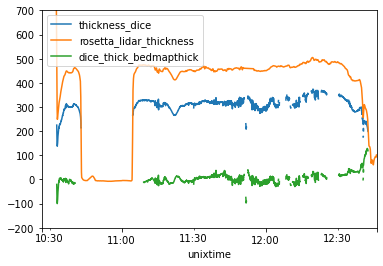

In [13]:

line[['thickness_dice', 'rosetta_lidar_thickness', 'dice_thick_bedmapthick']].plot()
plt.ylim([-200, 700])
# plt.xlim(pd.Timestamp('2015-12-02 11:10:00'), pd.Timestamp('2015-12-02 12:39:00'))


### Sea level from LIDAR

In [14]:
# ssh_lidar = gb.get_group('T1090').loc[13900:14100]['rosetta_lidar_wrtgeo'].mean()
#     print(f"Sea level is {ssh_lidar}m")

(1449052200.0, 1449054900.0)

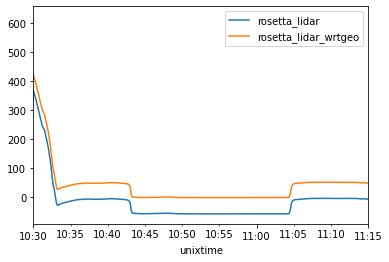

In [15]:
line[['rosetta_lidar', 'rosetta_lidar_wrtgeo']].plot()
plt.xlim(pd.Timestamp('2015-12-02 10:30:00'), pd.Timestamp('2015-12-02 11:15:00'))

In [16]:
start_openwater = '2015-12-02 10:45:00'
end_openwater = '2015-12-02 11:00:00'

start_channel = '2015-12-02 11:20:00'
end_channel = '2015-12-02 11:25:00'

In [17]:
ssh_lidar = line.loc[start_openwater:end_openwater]['rosetta_lidar'].mean()
# print(line.between_time(pd.Timestamp('2015-12-02 10:10:00'), pd.Timestamp('2015-12-02 11:39:00'))['rosetta_lidar'].mean())

print(line.loc[start_openwater:end_openwater]['rosetta_lidar_wrtgeo'].mean())
print(f"Sea level is {ssh_lidar:.3f}m")

-0.36675299690189134
Sea level is -56.431m


In [18]:
line['rosetta_lidar_wrtssh'] = line['rosetta_lidar'] - ssh_lidar


/var/folders/4b/tlrtp4_x48bdc8tdw206wqzr0000gn/T/ipykernel_3196/4022891367.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  line['rosetta_lidar_wrtssh'] = line['rosetta_lidar'] - ssh_lidar


Text(0, 0.5, 'Icesurface Diff [m]')

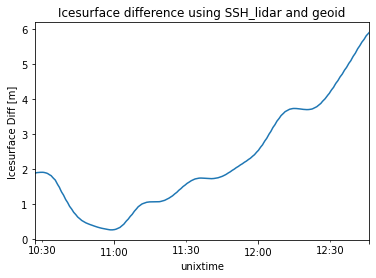

In [19]:
(line['rosetta_lidar_wrtssh'] - line['rosetta_lidar_wrtgeo']).plot()
plt.title('Icesurface difference using SSH_lidar and geoid')
plt.ylabel('Icesurface Diff [m]')

In [20]:
line.columns

Index(['Line', 'X_EPSG_3031', 'Y_EPSG_3031', 'unixtime', 'thickness_dice',
       'rosetta_lidar', 'rosetta_lidar_wrtgeo', 'rosetta_lidar_thickness',
       'diff_diceltthick_rsaltthick', 'dice_thick_bedmapthick',
       'rosetta_lidar_wrtssh'],
      dtype='object')

In [21]:
line['icebase_dice'] = line['rosetta_lidar'] - line['thickness_dice']


/var/folders/4b/tlrtp4_x48bdc8tdw206wqzr0000gn/T/ipykernel_3196/4092117851.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  line['icebase_dice'] = line['rosetta_lidar'] - line['thickness_dice']


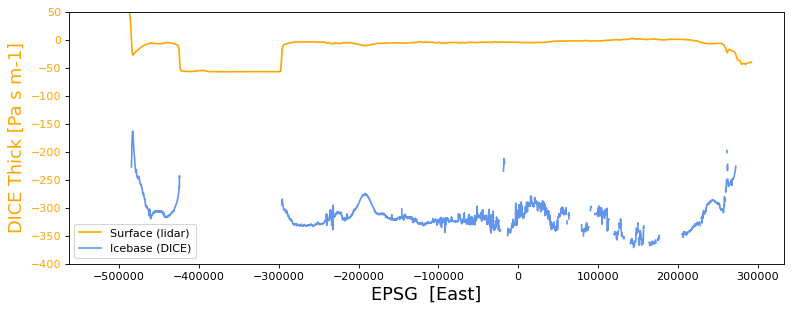

In [23]:
fig, ax = plt.subplots(figsize=(10, 4), dpi=80)

ax.plot(line['X_EPSG_3031'], line['rosetta_lidar'], label='Surface (lidar)', color='orange')
ax.tick_params(axis='y', labelcolor='orange')
ax.set_ylabel('DICE Thick [Pa s m-1]', color='orange', fontsize=16)
ax.set_xlabel('EPSG  [East]', color='black', fontsize=16)
# add_basin_locs()

ax.plot(line['X_EPSG_3031'], line['icebase_dice'], color='cornflowerblue', 
        label='Icebase (DICE)', ls='-', marker='')
# ax.tick_params(axis='y', labelcolor='cornflowerblue')
# ax.set_ylabel('Icebase DICE', color='cornflowerblue', fontsize=16)


# ax4 = ax.twinx()
# ax4.plot(df['Dist'].loc[df['water'] >= 0.1]/1e3, df['water'].loc[df['water'] >= 0.1], color='green', ls='', marker='*')
# ax4.tick_params(axis='y', labelcolor='green')
# ax4.set_ylabel('Water', color='green', fontsize=16)
# ax4.spines['right'].set_position(('axes', 1.2))

plt.ylim([-400, 50])
# plt.xlim(pd.Timestamp('2015-12-02 11:10:00'), pd.Timestamp('2015-12-02 12:39:00'))
plt.legend()
plt.tight_layout()
# plt.savefig('figs/lineplot_UTG_sample_ClassBeta.png')

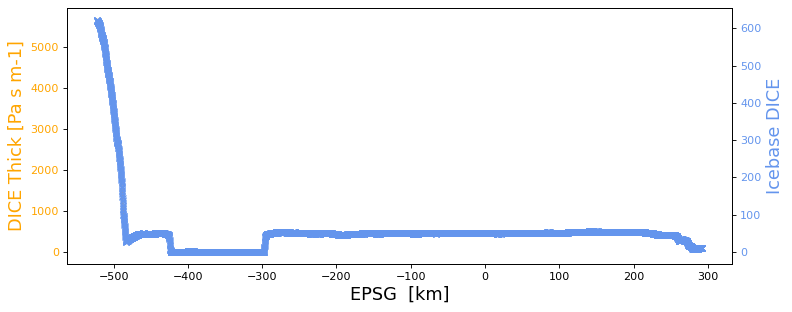

In [24]:
fig, ax = plt.subplots(figsize=(10, 4), dpi=80)

ax.plot(line['X_EPSG_3031']/1e3, line['rosetta_lidar_thickness'], color='orange')
ax.tick_params(axis='y', labelcolor='orange')
ax.set_ylabel('DICE Thick [Pa s m-1]', color='orange', fontsize=16)
ax.set_xlabel('EPSG  [km]', color='black', fontsize=16)
# add_basin_locs()

ax3 = ax.twinx()
ax3.plot(line['X_EPSG_3031']/1e3, line['rosetta_lidar_wrtgeo'], color='cornflowerblue', ls='', marker='x')
ax3.tick_params(axis='y', labelcolor='cornflowerblue')
ax3.set_ylabel('Icebase DICE', color='cornflowerblue', fontsize=16)

# ax4 = ax.twinx()
# ax4.plot(df['Dist'].loc[df['water'] >= 0.1]/1e3, df['water'].loc[df['water'] >= 0.1], color='green', ls='', marker='*')
# ax4.tick_params(axis='y', labelcolor='green')
# ax4.set_ylabel('Water', color='green', fontsize=16)
# ax4.spines['right'].set_position(('axes', 1.2))


plt.tight_layout()
# plt.savefig('figs/lineplot_UTG_sample_ClassBeta.png')



## Impact of firn density assumptions on basal channel geometry

In [25]:
line.columns

Index(['Line', 'X_EPSG_3031', 'Y_EPSG_3031', 'unixtime', 'thickness_dice',
       'rosetta_lidar', 'rosetta_lidar_wrtgeo', 'rosetta_lidar_thickness',
       'diff_diceltthick_rsaltthick', 'dice_thick_bedmapthick',
       'rosetta_lidar_wrtssh', 'icebase_dice'],
      dtype='object')

In [26]:
# line['bedmap2_surface_wrtell_SHIFT'] = line['bedmap2_surface_wrtell'].shift(0)
# print(line[['bedmap2_surface_wrtell_SHIFT', 'rosetta_lidar_wrtgeo']].corr())

line[['thickness_dice',
       'rosetta_lidar', 'rosetta_lidar_wrtgeo', 'rosetta_lidar_thickness',
       'diff_diceltthick_rsaltthick', 'dice_thick_bedmapthick']].corr()

,thickness_dice,rosetta_lidar,rosetta_lidar_wrtgeo,rosetta_lidar_thickness,diff_diceltthick_rsaltthick,dice_thick_bedmapthick
thickness_dice,1.000000,0.894866,0.879730,0.879730,-0.279677,-0.002317
rosetta_lidar,0.894866,1.000000,0.999846,0.999846,-0.583321,-0.233902
rosetta_lidar_wrtgeo,0.879730,0.999846,1.000000,1.000000,-0.702540,-0.400131
rosetta_lidar_thickness,0.879730,0.999846,1.000000,1.000000,-0.702540,-0.400131
diff_diceltthick_rsaltthick,-0.279677,-0.583321,-0.702540,-0.702540,1.000000,0.813533
dice_thick_bedmapthick,-0.002317,-0.233902,-0.400131,-0.400131,0.813533,1.000000


In [27]:
## QAQC edit
# df_sub['icebase_dice_edit'] = np.where(df['icebase_dice']>-500, df['icebase_dice'], df['icebase_dice']+300)

# line['icebase_dice_edit'] = line['icebase_dice']
# line['icebase_dice_edit'][line['icebase_dice']<-500] = line['icebase_dice'] + 284

# line[['icebase_dice_edit', 'rosetta_lidar_wrtgeo']].plot()

In [28]:
rho_water = 1.025
rho_ice = 0.917
rho_firn = 0.7
# H_firn = 0 
H_firn = 50
H_ave = line.thickness_dice.mean()
rho_ave = (rho_ice * (H_ave - H_firn)/H_ave) + (rho_firn * H_firn/H_ave)
rho_ave

0.8817862078155445

/var/folders/4b/tlrtp4_x48bdc8tdw206wqzr0000gn/T/ipykernel_3196/1188404628.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  line['thickness_hydro'] = line['rosetta_lidar_wrtgeo']/(1-(rho_ave/rho_water))


(0.0, 600.0)

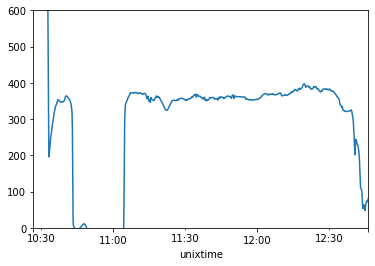

In [29]:
# =h_geoid/(1-(rho_ave/1.035))
line['thickness_hydro'] = line['rosetta_lidar_wrtgeo']/(1-(rho_ave/rho_water))
line['thickness_hydro'].plot()
plt.ylim([0, 600])

TODO: make this a function

### why `wrtgeo` though?

/var/folders/4b/tlrtp4_x48bdc8tdw206wqzr0000gn/T/ipykernel_3196/2217980898.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  line['icebase_hydro'] = line['rosetta_lidar_wrtgeo'] - line['thickness_hydro']


(-300000.0, 300000.0)

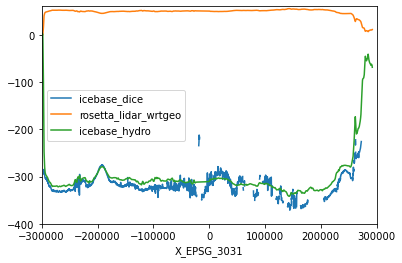

In [30]:
line['icebase_hydro'] = line['rosetta_lidar_wrtgeo'] - line['thickness_hydro']

## plot
line.plot(x='X_EPSG_3031', y = ['icebase_dice', 'rosetta_lidar_wrtgeo', 'icebase_hydro'])
plt.ylim([-400, 60])
plt.xlim([-3e5, 3e5])
# plt.xlim(pd.Timestamp('2015-12-02 11:10:00'), pd.Timestamp('2015-12-02 12:39:00'))

##
# fig, ax = plt.subplots(figsize=(10, 4), dpi=80)

# ax.plot(line['X_EPSG_3031'], line['rosetta_lidar'], label='Surface (lidar)', color='orange')
# ax.tick_params(axis='y', labelcolor='orange')
# ax.set_ylabel('DICE Thick [Pa s m-1]', color='orange', fontsize=16)
# ax.set_xlabel('EPSG  [East]', color='black', fontsize=16)
# # add_basin_locs()

# ax.plot(line['X_EPSG_3031'], line['icebase_dice'], color='cornflowerblue', 
#         label='Icebase (DICE)', ls='-', marker='')
# # ax.tick_params(axis='y', labelcolor='cornflowerblue')
# # ax.set_ylabel('Icebase DICE', color='cornflowerblue', fontsize=16)

# # ax4 = ax.twinx()
# # ax4.plot(df['Dist'].loc[df['water'] >= 0.1]/1e3, df['water'].loc[df['water'] >= 0.1], color='green', ls='', marker='*')
# # ax4.tick_params(axis='y', labelcolor='green')
# # ax4.set_ylabel('Water', color='green', fontsize=16)
# # ax4.spines['right'].set_position(('axes', 1.2))

# plt.ylim([-400, 50])
# plt.xlim(pd.Timestamp(start_channel), pd.Timestamp(end_channel))
# plt.legend()
# plt.tight_layout()
# # plt.savefig('figs/lineplot_UTG_sample_ClassBeta.png')

In [31]:
# rema_file = '/Users/dporter/data/Antarctic/DEM/REMA/SETSM_WV01_20171016_102001006659B400_102001006CCF3100_seg1_2m_v1.0/SETSM_WV01_20171016_102001006659B400_102001006CCF3100_seg1_2m_v1.0_dem.tif'
rema_file = '/Users/dporter/data/Antarctic/DEM/REMA/SETSM_WV01_20151130_1020010048BBA700_1020010048C54400_seg1_2m_v1.0/SETSM_WV01_20151130_1020010048BBA700_1020010048C54400_seg1_2m_v1.0_dem.tif'
src = rasterio.open(rema_file)

In [32]:
print(src.name)
print(src.mode)
print(src.closed)
print('\n')
print_raster(src)

/Users/dporter/data/Antarctic/DEM/REMA/SETSM_WV01_20151130_1020010048BBA700_1020010048C54400_seg1_2m_v1.0/SETSM_WV01_20151130_1020010048BBA700_1020010048C54400_seg1_2m_v1.0_dem.tif
r
False


shape: (43397, 15820)
bounds: BoundingBox(left=-202416.0, bottom=-1268666.0, right=-170776.0, top=-1181872.0)
CRS: EPSG:3031



In [33]:
for i, dtype, nodataval in zip(src.indexes, src.dtypes, src.nodatavals):
    print(i, dtype, nodataval)

1 float32 -9999.0


### Convert dataframe to GeoDataFrame (geoPandas)

In [34]:
## 1
# import geopandas as gpd
# crs = {'init': 'epsg:3031'}
# gdf = gpd.GeoDataFrame(line, crs=crs).set_geometry('geometry')

## 1.2
# from shapely import wkt

# line['geometry'] = line['geometry'].apply(wkt.loads)
# gdf = gpd.GeoDataFrame(line, crs='epsg:4326')


## 2
gdf = gpd.GeoDataFrame(
    line, geometry=gpd.points_from_xy(line.X_EPSG_3031, line.Y_EPSG_3031)
)

<AxesSubplot:>

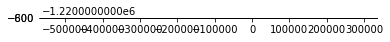

In [35]:
gdf.plot()

<AxesSubplot:>

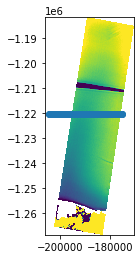

In [36]:
from rasterio.plot import show

## 1
# show(src, 
#      interpolation='none', 
#      vmin=-20, vmax=-5,
#      transform=src.transform,
#      )

## 2
fig, ax = plt.subplots()

# transform rasterio plot to real world coords
extent=[src.bounds[0], src.bounds[2], src.bounds[1], src.bounds[3]]
ax = rasterio.plot.show(src, extent=extent, ax=ax, 
                        interpolation='none', 
                        vmin=-20, vmax=-5, 
                        cmap='viridis',
                       )

gdf.loc[start_channel:end_channel].plot(ax=ax)



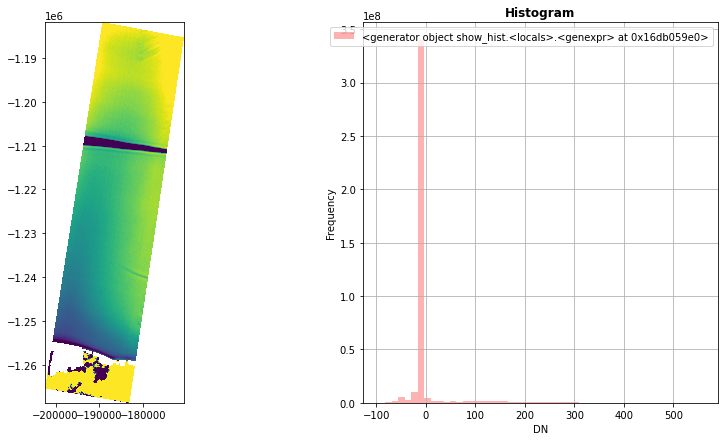

In [38]:
from rasterio.plot import show_hist

fig, (axrgb, axhist) = plt.subplots(1, 2, figsize=(14,7))

show(src, 
     interpolation='none', 
     vmin=-20, vmax=-5,
     transform=src.transform,
     ax=axrgb,
     )
show_hist(
    src, bins=50, lw=0.0, stacked=False, alpha=0.3,
    histtype='stepfilled', title="Histogram",
    ax=axhist,
    )
plt.show()

In [62]:
coord_list = [(x,y) for x,y in zip(gdf['geometry'].x , gdf['geometry'].y)]

In [63]:
coord_list[:5]

[(-522505.514637067, -1220915.4920904),
 (-522406.984789516, -1220897.67816384),
 (-522308.309492541, -1220880.07198186),
 (-522209.488287634, -1220862.65378756),
 (-522110.510614176, -1220845.42869854)]

In [67]:
gdf['rema'] = [x[0] for x in src.sample(coord_list)]
# print(gdf['rema'].head())

In [68]:
# gdf.replace(-9999, pd.NA, inplace=True)
gdf.loc[gdf['rema'] == -9999,'rema'] = np.nan

gdf.describe()


,X_EPSG_3031,Y_EPSG_3031,unixtime,thickness_dice,rosetta_lidar,rosetta_lidar_wrtgeo,rosetta_lidar_thickness,diff_diceltthick_rsaltthick,dice_thick_bedmapthick,rosetta_lidar_wrtssh,icebase_dice,thickness_hydro,icebase_hydro,rema
count,8371.000000,8.371000e+03,8.371000e+03,5379.000000,8371.000000,8371.000000,8371.000000,5379.000000,4957.000000,8371.000000,5379.000000,8371.000000,8371.000000,199.000000
mean,-109902.964065,-1.220620e+06,1.449056e+09,308.117909,2.872736,57.104613,519.500375,-138.332749,5.069685,59.304108,-313.245468,408.705249,-351.600635,-9.342135
std,236080.804601,2.200332e+01,2.416644e+03,29.081379,85.825162,85.752453,780.119658,19.430267,23.384209,85.825162,25.385170,613.741614,527.989161,1.393245
min,-522505.514637,-1.220915e+06,1.449052e+09,137.750468,-56.966527,-0.825691,-7.511595,-255.920300,-99.843622,-0.535155,-370.659204,-5.909579,-3840.393882,-11.191577
25%,-314264.317387,-1.220636e+06,1.449054e+09,299.034963,-7.978765,45.334095,412.419912,-146.249155,-8.295173,48.452607,-327.724410,324.462100,-317.605309,-10.691278
50%,-108258.987270,-1.220624e+06,1.449056e+09,312.391791,-4.673797,49.947681,454.391294,-140.927068,2.786439,51.757575,-317.090218,357.482142,-307.534461,-9.616969
75%,96375.775052,-1.220607e+06,1.449058e+09,324.157293,-1.878310,51.583321,469.271271,-134.025283,13.546981,54.553062,-304.513361,369.188630,-279.128004,-8.153692
max,292428.955095,-1.220559e+06,1.449060e+09,373.272514,569.170911,623.730975,5674.295951,23.190334,128.482081,625.602283,-162.807767,4464.124857,5.083888,-6.856775


(-12.0, -2.0)

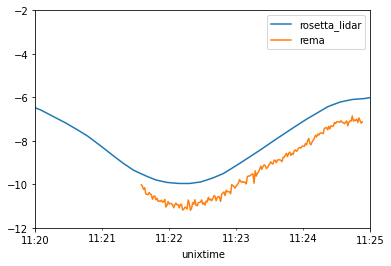

In [79]:
# gdf['rema'].plot()
gdf[['rosetta_lidar', 'rema']].plot()
plt.xlim(pd.Timestamp(start_channel), pd.Timestamp(end_channel))
plt.ylim([-12,-2])


### Appendix

`grouby`

In [ ]:
if Line == 'l790':
    # gb.get_group('T1090').min()
    gb.get_group('T1090').rosetta_lidar_wrtgeo.plot()
    plt.xlim([13500, 14300])
    plt.ylim([-5, 5])
    ssh_lidar = gb.get_group('T1090').loc[13900:14100]['rosetta_lidar_wrtgeo'].mean()
    print(f"Sea level is {ssh_lidar}m")

In [ ]:
# df_sub['thickness_hydro_ave'] = df_sub['rosetta_lidar_wrtgeo']/(1-(rho_ave/1.035))
# df_sub['thickness_hydro_ave_ssh'] = (df_sub['rosetta_lidar_wrtgeo']- ssh_lidar)/(1-(rho_ave/1.035))

df_sub['icebase_hydro'] = df_sub['rosetta_lidar_wrtgeo'] - df_sub['rosetta_lidar_wrtgeo']/(1-(rho_ice/rho_water))
df_sub['icebase_hydro_ssh'] = df_sub['rosetta_lidar_wrtgeo'] - (df_sub['rosetta_lidar_wrtgeo']- ssh_lidar)/(1-(rho_ice/rho_water))

df_sub['icebase_hydro_firn'] = df_sub['rosetta_lidar_wrtgeo'] - df_sub['rosetta_lidar_wrtgeo']/(1-(rho_ave/rho_water))
df_sub['icebase_hydro_firn_ssh'] = df_sub['rosetta_lidar_wrtgeo'] - (df_sub['rosetta_lidar_wrtgeo']- ssh_lidar)/(1-(rho_ave/rho_water))

fig = plt.figure(dpi=150)
df_sub.plot(x='X_EPSG_3031', 
            y=['rosetta_lidar_wrtgeo', 'icebase_dice_edit', 'icebase_hydro_firn', 'icebase_hydro'],
           figsize=(4,7))
plt.title(Line + r': 50m of 0.7$g cm^{-3}$ firn')
plt.ylabel('m.a.s.l.')
plt.legend(["Surface - LIDAR", "Icebase - radar", "Hydrostatic (with firn)", "Hydrostatic (ice only)"], 
           loc='upper center', 
           fontsize=10, 
           shadow=True, 
           bbox_to_anchor=(0.5, 0.83), 
           ncol=1,
          );
plt.xticks(rotation=45)
plt.savefig(f'/Users/dporter/Google Drive (dporter@ldeo.columbia.edu)/Proposals_gdrive/NASA_ROSES_A15_2021/Figures/ROSETTA_{Line}_hydrotest_rho.png')


# print(f"Mean ice thickness diff when using real sea level (not just geoid) \
#       {(df_sub['thickness_hydro_ssh']-df_sub['thickness_hydro']).mean()}")